### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [ ]:
data = pd.read_csv("global_heat_index.csv")

In [ ]:
data.head(5)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


## Cleaning data

In [ ]:
clean1 = data[data['Hour']<6]
clean2 = data[data['Hour']>18]

print("Cleaning Data from 12:00 am to 5:59 am")
clean1.head(10)

Cleaning Data from 12:00 am to 5:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0
26,2011,1,2,2,3,9.165823,984.032227,66.509376,90.634872,1.904846,0
27,2011,1,2,3,3,8.773836,984.161560,69.923065,90.924843,1.597840,0


In [ ]:
print("Cleaning Data from 18:00 pm to  12.00 am")
clean2.head(10)

Cleaning Data from 18:00 pm to  12.00 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
43,2011,1,2,19,5,14.152280,987.563416,54.899280,64.419899,2.399542,0
44,2011,1,2,20,4,13.421063,987.949341,55.893813,73.117203,2.673051,0
45,2011,1,2,21,4,12.687589,987.704529,57.250441,81.467941,2.940782,0
46,2011,1,2,22,4,11.969086,987.413086,58.991594,89.379547,3.099676,0
47,2011,1,2,23,4,11.248868,986.698791,61.125686,96.687325,3.158645,0


In [ ]:
data = data.drop(clean1.index, axis = 0)
data = data.drop(clean2.index, axis = 0)

In [ ]:
data.shape

(9490, 11)

In [ ]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642,433.934668
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931,307.352650
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960,148.000000
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798,446.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406,693.000000
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084,1001.000000


## Input and Output Data

In [ ]:
x = data.iloc[:, 0:10]
y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(x))

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046


In [ ]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


## <font color = "green">ExtraTreeClassifier</font>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [ ]:
col = ['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',]
feature_imp = pd.Series(model.feature_importances_, index = col)
feature_imp

Year                 0.027099
Month                0.043256
Day                  0.110130
Hour                 0.109029
Dew Point            0.088947
Temperature          0.139714
Pressure             0.124314
Relative Humidity    0.123519
Wind Direction       0.116817
Wind Speed           0.117175
dtype: float64

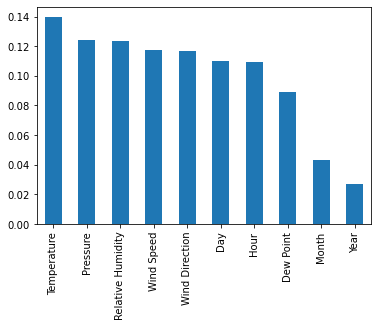

In [ ]:
feature_imp.nlargest(10).plot(kind = "bar")
plt.show()